In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
# Read measurement schema
measurement_schema = pd.read_excel(
    '/workspaces/Magnetic_Measurements_Plotting/Messpunktschema Vorlage.xlsx',
    sheet_name='Messpunktschema',
    header=None
)
measurement_schema = np.array(measurement_schema)

# Read parameters
parameters = pd.read_excel(
    '/workspaces/Magnetic_Measurements_Plotting/Messpunktschema Vorlage.xlsx',
    sheet_name='Parameter'
)

x_distance = parameters.loc[0]['Wert']
y_distance = parameters.loc[1]['Wert']

measurements_df = pd.read_excel(
    '/workspaces/Magnetic_Measurements_Plotting/Messpunktschema Vorlage.xlsx',
    sheet_name='Messwerte'
)

measurements_df.head()

,Messung Nr.,Messort,Flussdichte [µT] (3D-Wert),Flussdichte [µT] (X-Wert),Flussdichte [µT] (Y-Wert),Flussdichte [µT] (Z-Wert),Kompassnadelabweichung [°]
0,0,neutrales Erdmagnet-feld,49.9,-21.7,3.6,-45.4,0
1,1,A1,45.5,-21.9,0.0,-39.8,0
2,2,A2,46.3,-13.9,0.4,-44.4,0
3,3,A3,45.9,-14.4,0.0,-43.7,0
4,4,A4,46.1,-18.3,3.5,-42.2,5


Reconstructing X, Y and Z

In [26]:
measurement_schema

array([['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
       ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
       ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
       ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
       ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5']],
      dtype=object)

In [31]:
n_y, n_x = measurement_schema.shape

x = np.linspace(0, n_x * x_distance, n_x)
y = np.linspace(0, n_y * y_distance, n_y)

X, Y = np.meshgrid(x, y)

In [59]:
Z = np.zeros_like(measurement_schema)

for index, df_row in measurements_df[1:].iterrows():

    key = df_row['Messort']

    # Get position of key in measurement schema
    key_search_result = np.where(measurement_schema==key)
    row_indices = key_search_result[0]
    column_indices = key_search_result[1]

    row_index = row_indices[0]
    column_index = column_indices[0]

    Z[row_index,column_index] = df_row['Flussdichte [µT] (3D-Wert)']


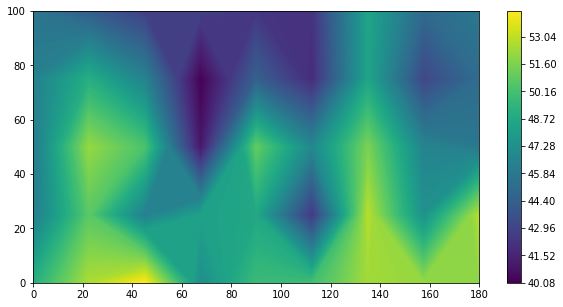

In [79]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z[::-1,:], 200, cmap='viridis')
plt.colorbar()
plt.show()

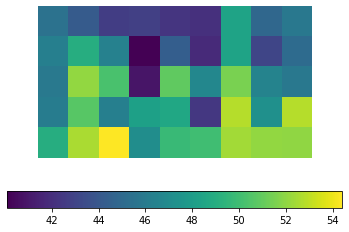

In [74]:
fig, ax = plt.subplots()
im = ax.imshow(Z.astype(float))
ax.set_axis_off()
fig.colorbar(im, orientation="horizontal")
fig.show()

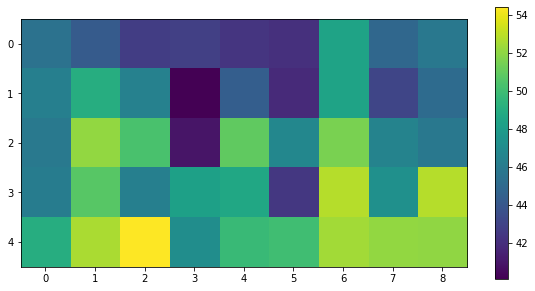

In [82]:
plt.figure(figsize=(10,5))
plt.imshow(Z.astype(float))
plt.colorbar()
plt.show()